<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O objetivo desta prática é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o objetivo, que é exemplificar a criação de um modelo de Regressão Linear.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

O DataSet está no mesmo diretório deste arquivo, esta nomeado como "HousePrices_HalfMil.csv" em usa como separador ";".

In [189]:
dados = pd.read_csv('../Dados/HousePrices_HalfMil.csv', sep=';')

## Visualizar os dados

In [190]:
dados.head()

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [191]:
dados.shape

(1000, 7)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [192]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>


In [194]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


## Conclusões observadas:


As variáveis que apresentam maior correlação com a variável dependente 'Preço' são:
- andares, com coeficiente de correlação linear positivo de 0.6315.
- marmore, com coeficiente dde correlação linear positivo de 0.4308. 
    

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [195]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [196]:
sns.set_palette("Pastel1")
sns.set_style("dark")

## Box plot da variável *dependente* (y)

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

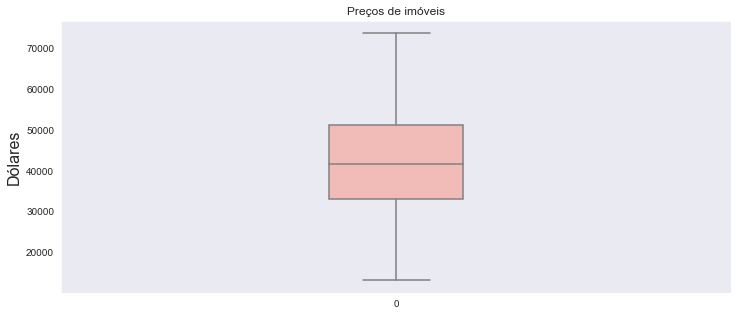

In [16]:
ax = sns.boxplot(data=dados['precos'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 5)
ax.set_title('Preços de imóveis')
ax.set_ylabel('Dólares', fontsize=16)
ax

## Conclusões observadas:


- Os dados não apresentam tendência pois apresentam quartis bem distribuídos e não apresentam valores discrepantes (ou outliers).

## Investigando a variável *dependente* (y) juntamente com outras característica

Gráficos de box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Box-plot (Preço X Garagem)

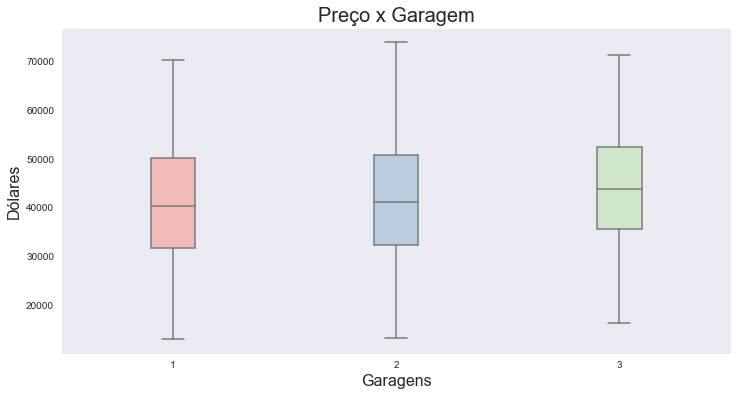

In [197]:
ax = sns.boxplot(y='precos', x='garagem', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço x Garagem', fontsize=20)
ax.set_ylabel('Dólares', fontsize=16)
ax.set_xlabel('Garagens', fontsize=16)
ax

## Conclusões observadas:


- O preço não é tão influenciado pelo número de garagens que o imóvel apresenta.

### Box-plot (Preço X Banheiros)

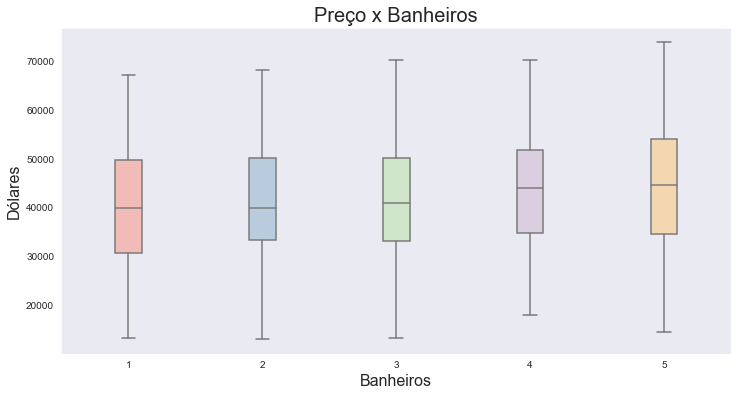

In [198]:
ax = sns.boxplot(y='precos', x='banheiros', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço x Banheiros', fontsize=20)
ax.set_ylabel('Dólares', fontsize=16)
ax.set_xlabel('Banheiros', fontsize=16)
ax

## Conclusões observadas:


- Há uma correlação baixa entre número de banheiros e o valor do imóvel. 

### Box-plot (Preço X Lareira)

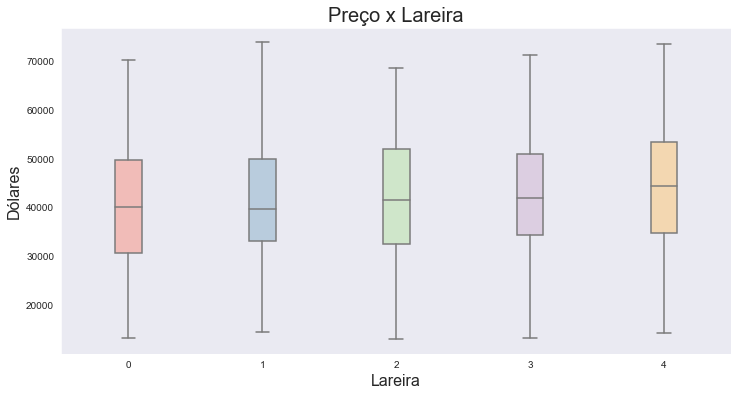

In [199]:
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço x Lareira', fontsize=20)
ax.set_ylabel('Dólares', fontsize=16)
ax.set_xlabel('Lareira', fontsize=16)
ax

In [54]:
print("Ocorrências para cada quantidade de lareiras: \n")
print(dados.lareira.value_counts(), "\n")

# Calculando a média do preço do imóvel para cada quantidade de lareira

# 0 lareira
print("Nenhuma lareira: R$ {0:,.2f}".format(dados.query('lareira == 0').precos.mean()))

# 1 lareira
print("Uma lareira: R$ {0:,.2f}".format(dados.query('lareira == 1').precos.mean()))

# 2 lareira
print("Duas lareiras: R$ {0:,.2f}".format(dados.query('lareira == 2').precos.mean()))

# 3 lareira
print("Três lareiras: R$ {0:,.2f}".format(dados.query('lareira == 3').precos.mean()))

# 4 lareira
print("Quatro lareiras: R$ {0:,.2f}".format(dados.query('lareira == 4').precos.mean()))

Ocorrências para cada quantidade de lareiras: 

3    210
4    205
0    198
2    197
1    190
Name: lareira, dtype: int64 

Nenhuma lareira: R$ 39,812.50
Uma lareira: R$ 41,317.76
Duas lareiras: R$ 42,265.23
Três lareiras: R$ 42,684.88
Quatro lareiras: R$ 43,718.41


## Conclusões observadas:

- O número de lareiras de um imóvel não apresenta grande influência sobre o valor do imóvel.

### Box-plot (Preço X Acabamento em Mármore)

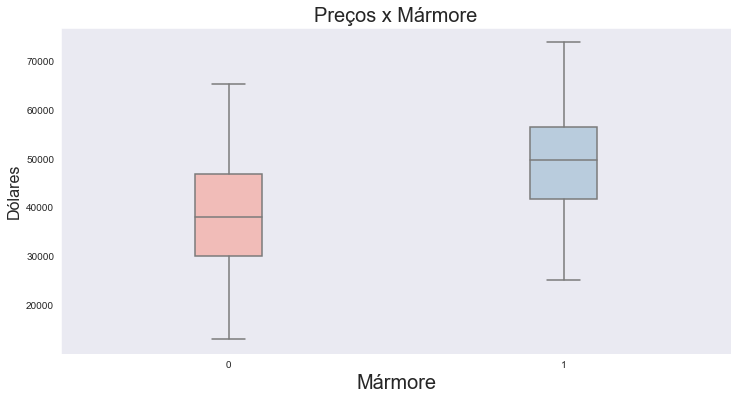

In [200]:
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preços x Mármore', fontsize=20)
ax.set_ylabel('Dólares', fontsize=16)
ax.set_xlabel('Mármore', fontsize=20)
ax

## Conclusões observadas:


- Há uma tendência de aumento de preço do imóvel quanto este possui acabamento em mármore branco (índice = 1).

### Box-plot (Preço X Andares)

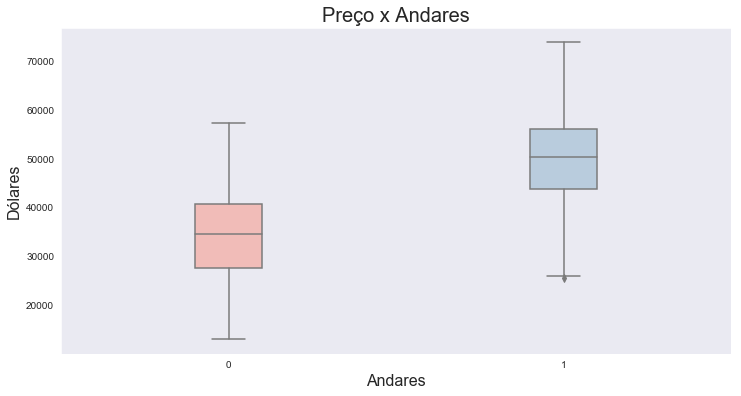

In [201]:
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço x Andares', fontsize=20)
ax.set_ylabel('Dólares', fontsize=16)
ax.set_xlabel('Andares', fontsize=16)
ax

## Conclusões observadas:

- Há claramente uma tendência de aumento de preço para imóveis que apresentam mais de um andar.

## Distribuição de frequências da variável *dependente* (y)

histograma da variável dependente (Preço).

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

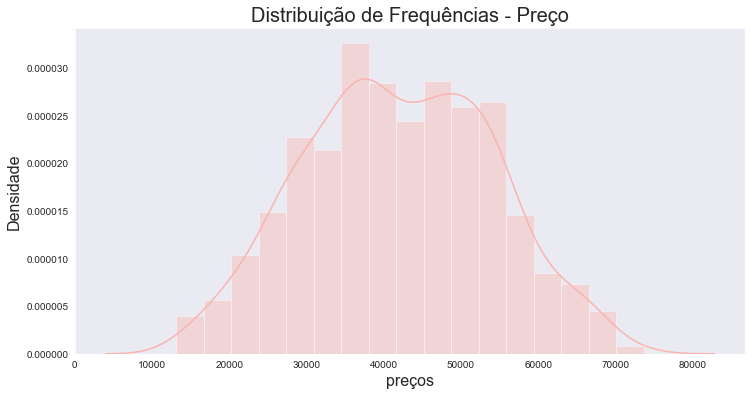

In [202]:
ax = sns.distplot(dados['precos'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Preço', fontsize=20)
ax.set_xlabel('preços', fontsize=16)
ax.set_ylabel('Densidade', fontsize=16)
ax

In [204]:
# Cálculo das medidas de tendência central para verificar se o gráfico segue um padrão simétrico.

print('Média: R$ {0:,.2f}'.format(dados.precos.mean()))
print('Mediana: R$ {0:,.2f}'.format(dados.precos.median()))
print('Moda: R$ {0:,.2f}'.format(float(dados.precos.mode()[0])))

Média: R$ 41,985.60
Mediana: R$ 41,725.00
Moda: R$ 35,400.00


## Conclusões observadas:

- Um gráfico simétrico possui medidas de tendência centrais próximas. Pode-se considerar que o gráfico em questão se aproxima de um gráfico simétrico.  

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Gráficos de dispersão da variável dependente contra cada variável explicativa. Utiliza o pairplot da biblioteca seaborn.

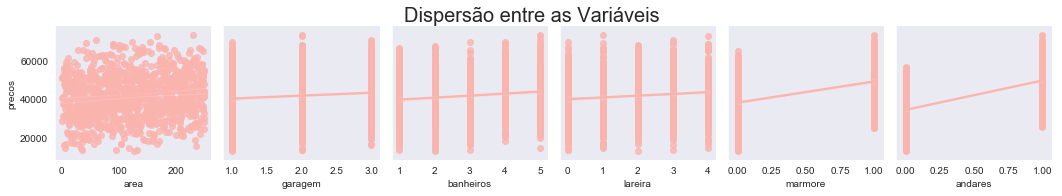

In [206]:
ax = sns.pairplot(dados, y_vars='precos', x_vars=['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

## Conclusões observadas:

- Embora as outras variáveis apresentam alguma correlação linear, as que apresentam mair influência são 'marmore' e 'andares'.
- Todas correlações são positivas.

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [207]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [208]:
y = dados['precos']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [210]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

## Criando os datasets de treino e de teste

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1000)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [212]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [213]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [214]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [215]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.64


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [216]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [217]:
print('R2 = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

R2 = 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [218]:
area=38
garagem=2
banheiros=4
lareira=4
marmore=0
andares=1

entrada=[[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(modelo.predict(entrada)[0]))

$ 46848.79


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo

In [219]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_previsto).round(2))
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], index=['EQM', 'REQM', 'R2'], columns=['métricas'])

,métricas
EQM,5.118966e+07
REQM,7.154695e+03
R2,6.700000e-01


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [158]:
import pickle

## Salvando o modelo estimado

In [220]:
output = open('modelo_preço', 'wb')
pickle.dump(modelo, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```